## 1. Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
df_original = pd.read_csv('../../bitcoin_price_sentiment.csv')  # Original data
df_filtered = pd.read_csv('../../bitcoin_price_sentiment_addmean.csv')  # Data with filled mean
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              222 non-null    object 
 1   Open              222 non-null    float64
 2   High              222 non-null    float64
 3   Low               222 non-null    float64
 4   Close             222 non-null    float64
 5   Volume            222 non-null    float64
 6   sentiment_scores  222 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.3+ KB


In [2]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660 entries, 0 to 4659
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              4660 non-null   object 
 1   Open              4660 non-null   float64
 2   High              4660 non-null   float64
 3   Low               4660 non-null   float64
 4   Close             4660 non-null   float64
 5   Volume            4660 non-null   float64
 6   sentiment_scores  4660 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.0+ KB


In [3]:
# Convert date columns to datetime
df_original['date'] = pd.to_datetime(df_original['date'])
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

In [4]:
# Create new dataframe df from full data and add is_real_sentiment flag
df = df_filtered.copy()

#Add flag for real sentiment (where sentiment_scores is not null in filtered dataset)
df['is_real_sentiment'] = False  # Initialize all as False
df.loc[df['sentiment_scores'].isin(df_original['sentiment_scores']), 'is_real_sentiment'] = True

In [5]:
# Verify the results
print("Data Summary:")
print(f"Total records: {len(df)}")
print(f"Real sentiment records: {df['is_real_sentiment'].sum()}")
print(f"Filled sentiment records: {len(df) - df['is_real_sentiment'].sum()}")

Data Summary:
Total records: 4660
Real sentiment records: 222
Filled sentiment records: 4438


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660 entries, 0 to 4659
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               4660 non-null   datetime64[ns]
 1   Open               4660 non-null   float64       
 2   High               4660 non-null   float64       
 3   Low                4660 non-null   float64       
 4   Close              4660 non-null   float64       
 5   Volume             4660 non-null   float64       
 6   sentiment_scores   4660 non-null   float64       
 7   is_real_sentiment  4660 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(6)
memory usage: 259.5 KB


In [7]:
df.head()

,date,Open,High,Low,Close,Volume,sentiment_scores,is_real_sentiment
0,2012-01-01,4.84,4.84,4.84,4.84,0.0,0.201493,False
1,2012-01-02,5.00,5.00,5.00,5.00,0.0,0.201493,False
2,2012-01-03,5.29,5.29,5.29,5.29,0.0,0.201493,False
3,2012-01-04,5.57,5.57,5.57,5.57,0.0,0.201493,False
4,2012-01-05,6.42,6.42,6.42,6.42,0.0,0.201493,False


In [8]:
# Check for and handle any missing values (e.g., imputation, removal)
print(df.isnull().sum())

date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
sentiment_scores     0
is_real_sentiment    0
dtype: int64


In [9]:
# Set 'date' as index
df.set_index('date', inplace=True)

In [10]:
# Display summary statistics
df.describe()

,Open,High,Low,Close,Volume,sentiment_scores
count,4660.000000,4660.000000,4660.000000,4660.000000,4660.000000,4660.000000
mean,14217.715178,14225.534170,14209.306032,14217.351281,6.402338,0.201493
std,19019.724825,19030.738881,19008.394210,19019.602495,26.880723,0.013252
min,4.380000,4.380000,4.380000,4.380000,0.000000,0.074909
25%,411.835000,411.835000,411.117500,411.342500,0.041268,0.201493
50%,6207.695000,6209.165000,6198.380000,6200.030000,0.777980,0.201493
75%,22969.610000,22973.950000,22941.445000,22951.225000,4.110171,0.201493
max,73297.000000,73508.000000,73297.000000,73468.000000,1092.500223,0.405695


# 2. Data Visualization

In [11]:
print(f"Date range: from {df.index.min()} to {df.index.max()}")

Date range: from 2012-01-01 00:00:00 to 2024-10-03 00:00:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4660 entries, 2012-01-01 to 2024-10-03
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               4660 non-null   float64
 1   High               4660 non-null   float64
 2   Low                4660 non-null   float64
 3   Close              4660 non-null   float64
 4   Volume             4660 non-null   float64
 5   sentiment_scores   4660 non-null   float64
 6   is_real_sentiment  4660 non-null   bool   
dtypes: bool(1), float64(6)
memory usage: 259.4 KB


In [13]:
# Calculate the total number of days
total_days = (df.index.max() - df.index.min()).days + 1  # +1 to include both start and end dates
print(f"Total number of days: {total_days}")

# Check for gaps in the time series
date_range = pd.date_range(start=df.index.min(), end=df.index.max())
missing_dates = date_range.difference(df.index)
print(f"Number of missing dates: {len(missing_dates)}")

Total number of days: 4660
Number of missing dates: 0


In [14]:
# Print some key statistics
print(f"Highest closing price: ${df['Close'].max():.2f}")
print(f"Lowest closing price: ${df['Close'].min():.2f}")
print(f"Average daily trading volume: {df['Volume'].mean():.0f}")
print(f"Median sentiment score: {df['sentiment_scores'].median():.2f}")

Highest closing price: $73468.00
Lowest closing price: $4.38
Average daily trading volume: 6
Median sentiment score: 0.20


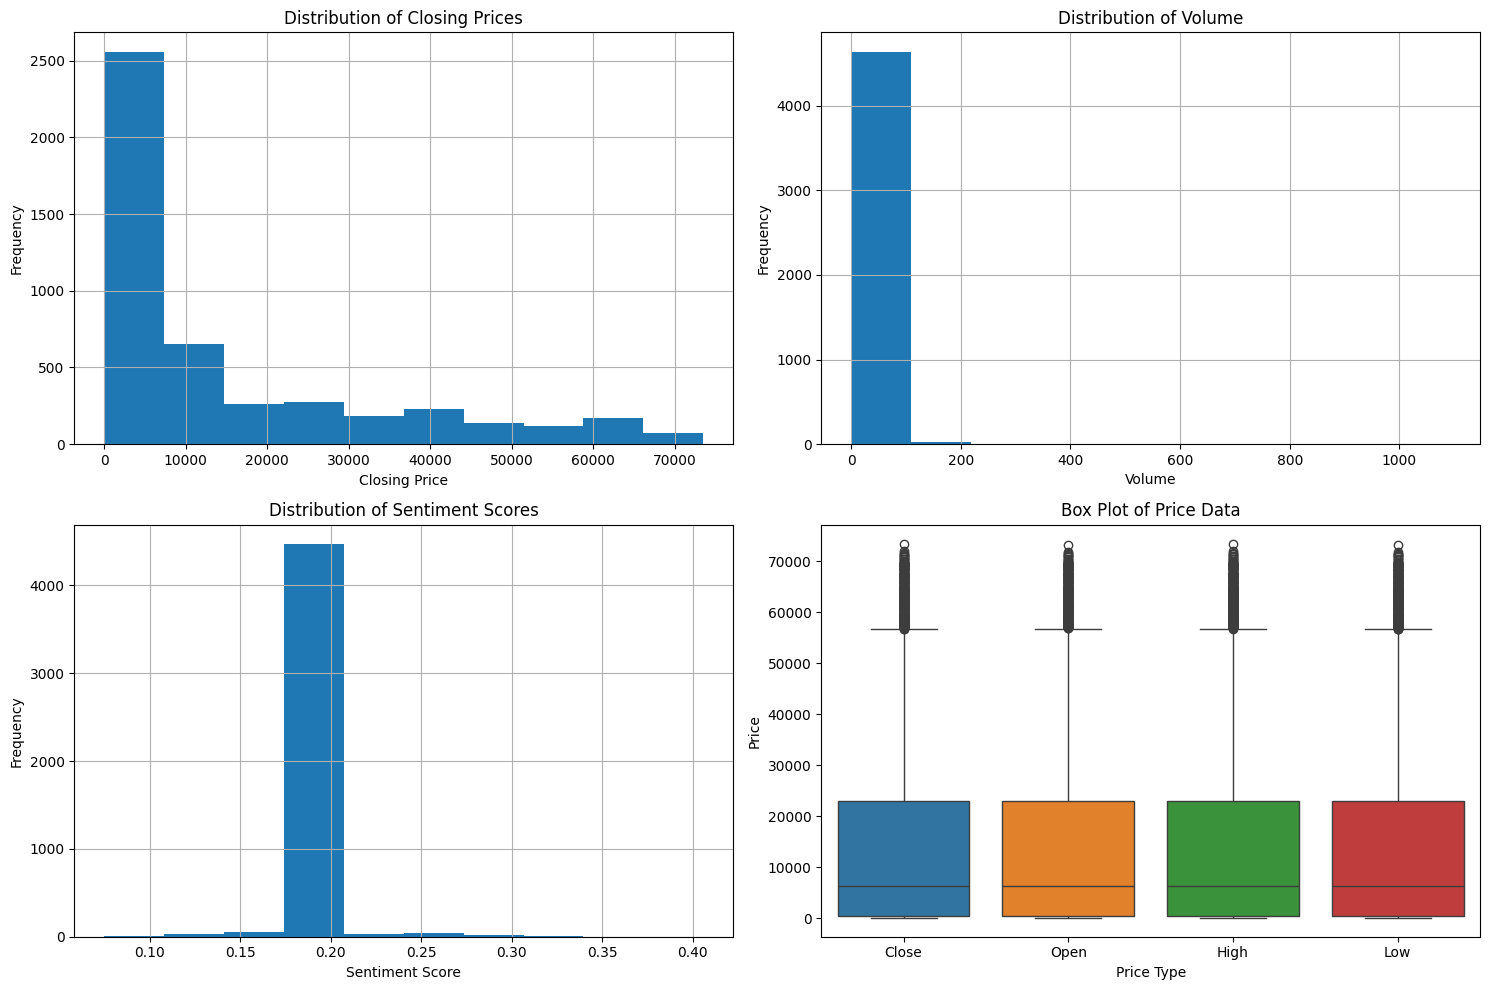

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['Close'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Closing Prices')
axes[0, 0].set_xlabel('Closing Price')
axes[0, 0].set_ylabel('Frequency')

df['Volume'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Volume')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')

df['sentiment_scores'].hist(ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sentiment Scores')
axes[1, 0].set_xlabel('Sentiment Score')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(data=df[['Close', 'Open', 'High', 'Low']], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Price Data')
axes[1, 1].set_xlabel('Price Type')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

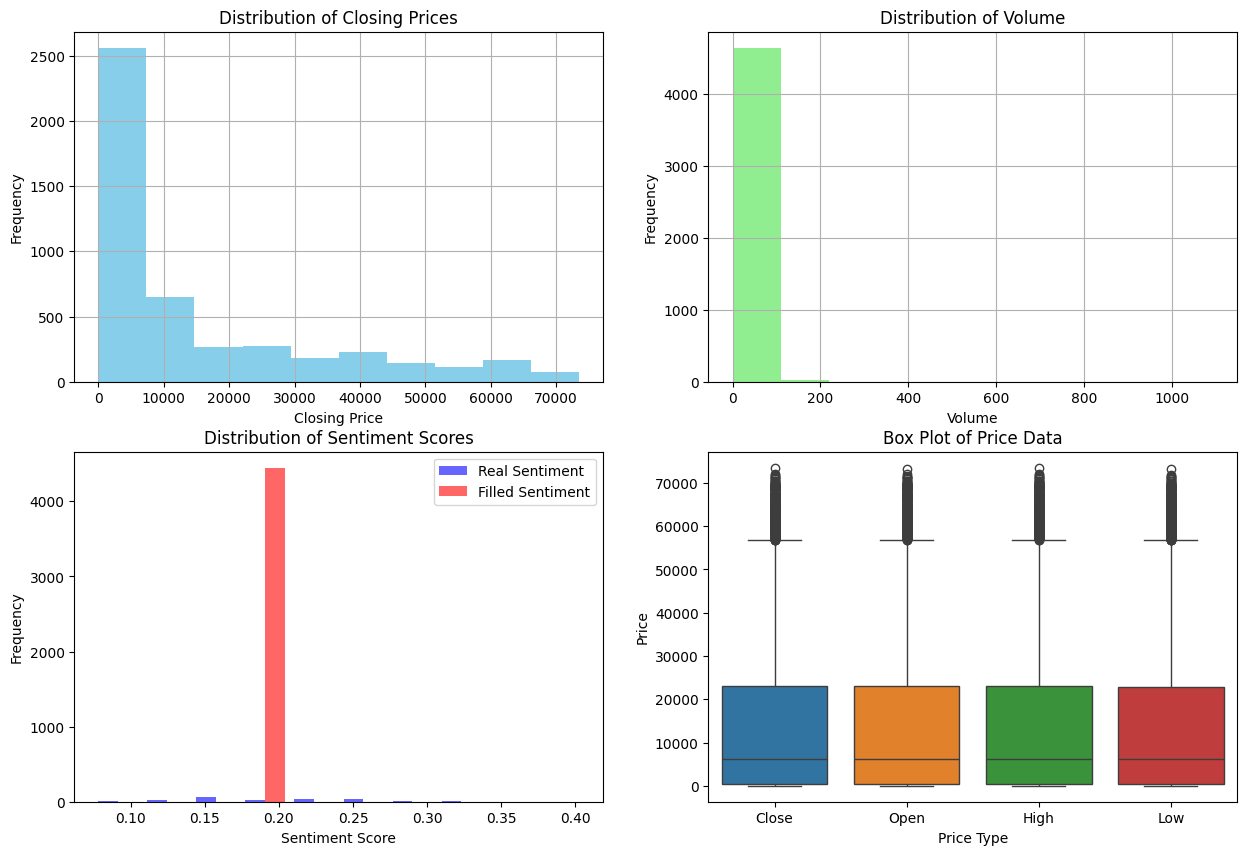

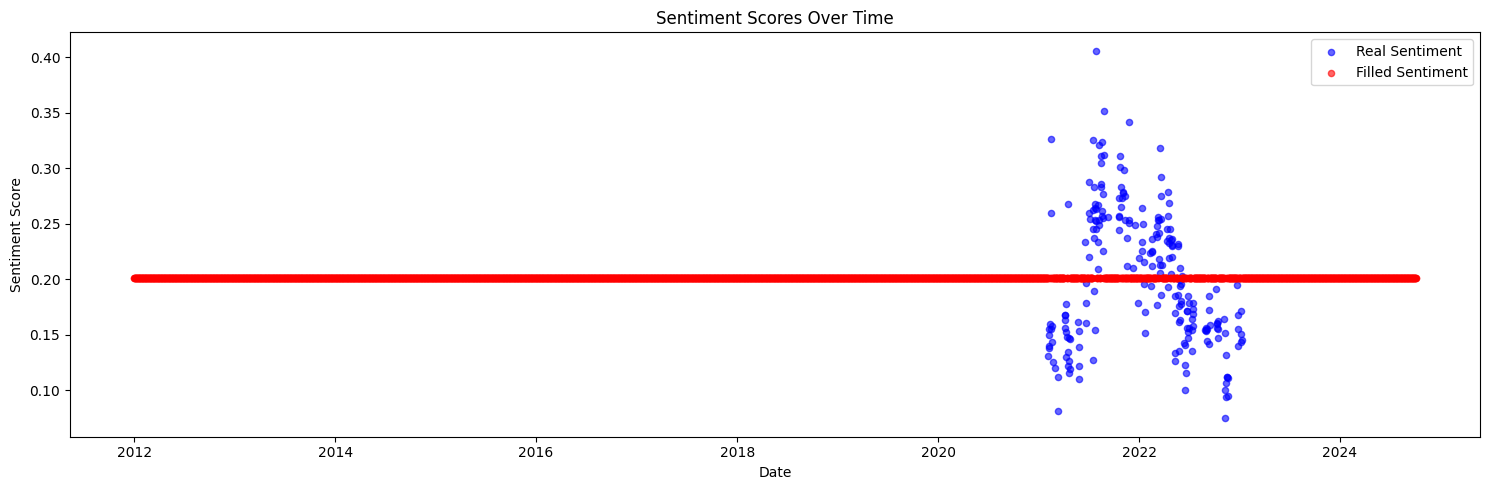

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Closing Prices Distribution
df['Close'].hist(ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Closing Prices')
axes[0, 0].set_xlabel('Closing Price')
axes[0, 0].set_ylabel('Frequency')

# Volume Distribution
df['Volume'].hist(ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Volume')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')

# Sentiment Scores Distribution - Split by is_real_sentiment
real_sentiment = df[df['is_real_sentiment']]['sentiment_scores']
filled_sentiment = df[~df['is_real_sentiment']]['sentiment_scores']

axes[1, 0].hist([real_sentiment, filled_sentiment], 
                label=['Real Sentiment', 'Filled Sentiment'],
                color=['blue', 'red'],
                alpha=0.6)
axes[1, 0].set_title('Distribution of Sentiment Scores')
axes[1, 0].set_xlabel('Sentiment Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Box Plot of Price Data
sns.boxplot(data=df[['Close', 'Open', 'High', 'Low']], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Price Data')
axes[1, 1].set_xlabel('Price Type')
axes[1, 1].set_ylabel('Price')

# Add time series plot of sentiment scores
fig2, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df.index[df['is_real_sentiment']], 
          df[df['is_real_sentiment']]['sentiment_scores'],
          c='blue', label='Real Sentiment', alpha=0.6, s=20)
ax.scatter(df.index[~df['is_real_sentiment']], 
          df[~df['is_real_sentiment']]['sentiment_scores'],
          c='red', label='Filled Sentiment', alpha=0.6, s=20)
ax.set_title('Sentiment Scores Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.legend()

plt.tight_layout()
plt.show()

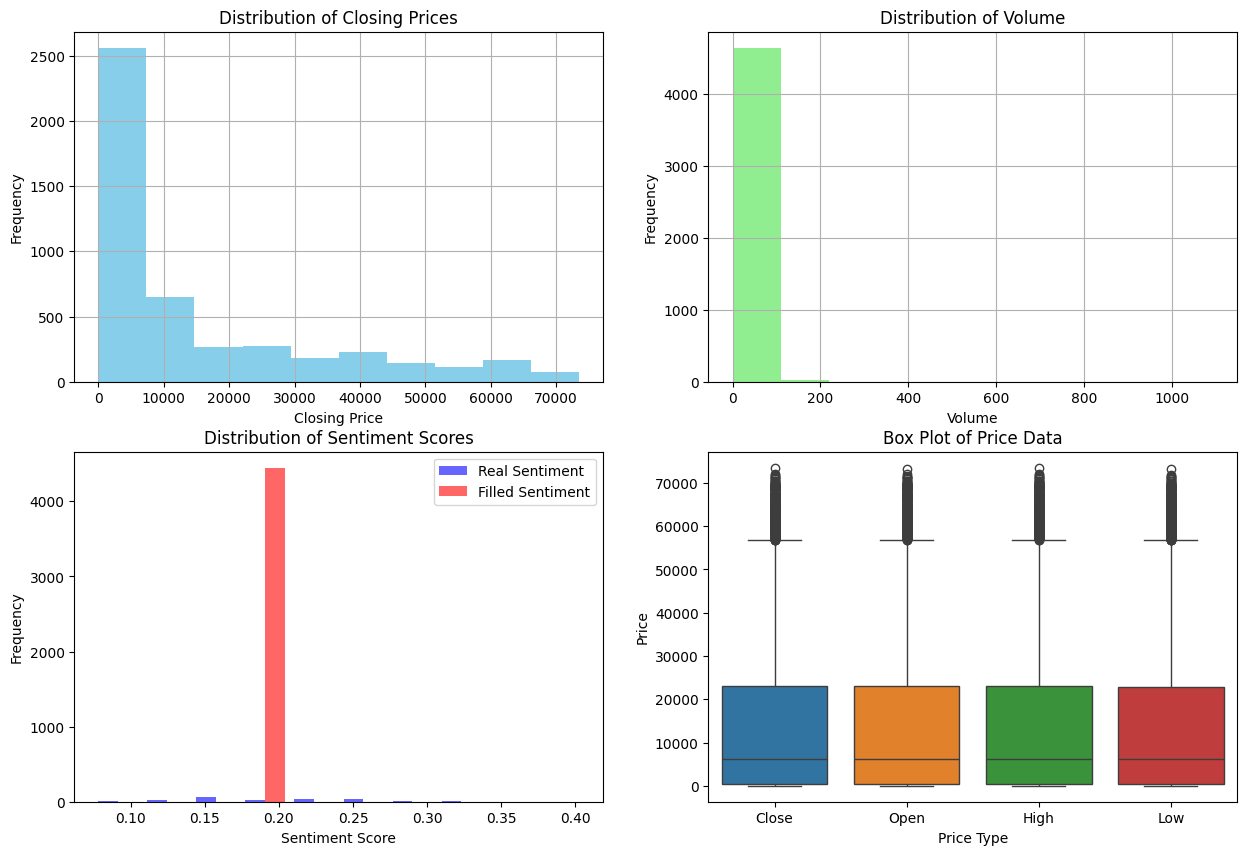

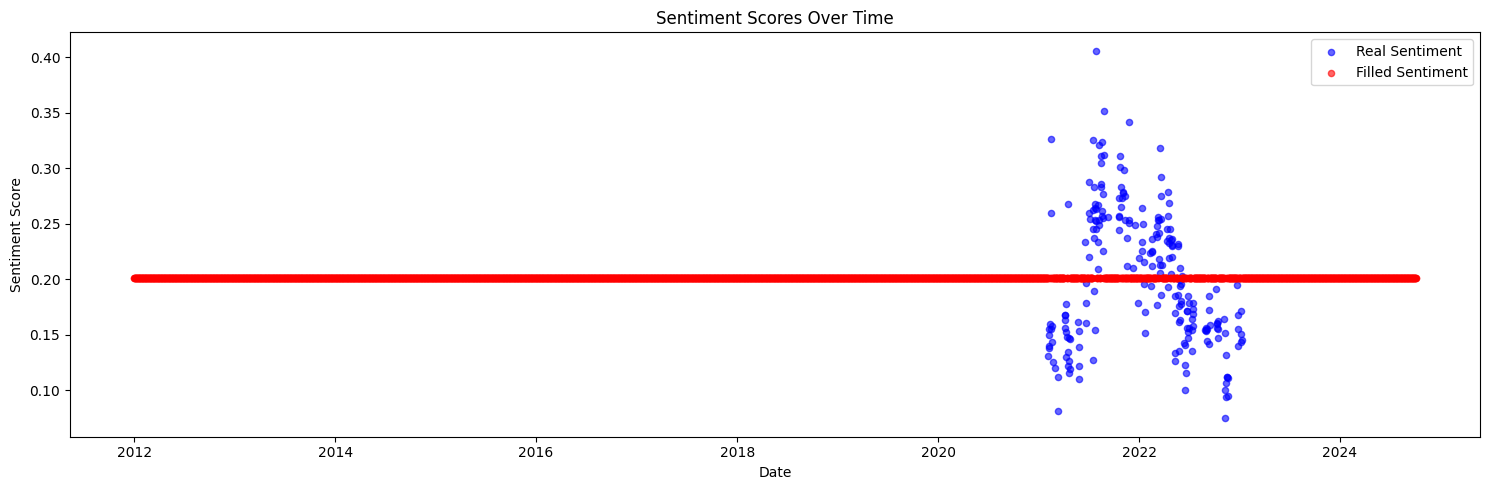

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Closing Prices Distribution
df['Close'].hist(ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Closing Prices')
axes[0, 0].set_xlabel('Closing Price')
axes[0, 0].set_ylabel('Frequency')

# Volume Distribution
df['Volume'].hist(ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Volume')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')

# Sentiment Scores Distribution - Split by is_real_sentiment
real_sentiment = df[df['is_real_sentiment']]['sentiment_scores']
filled_sentiment = df[~df['is_real_sentiment']]['sentiment_scores']

axes[1, 0].hist([real_sentiment, filled_sentiment], 
                label=['Real Sentiment', 'Filled Sentiment'],
                color=['blue', 'red'],
                alpha=0.6)
axes[1, 0].set_title('Distribution of Sentiment Scores')
axes[1, 0].set_xlabel('Sentiment Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Box Plot of Price Data
sns.boxplot(data=df[['Close', 'Open', 'High', 'Low']], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Price Data')
axes[1, 1].set_xlabel('Price Type')
axes[1, 1].set_ylabel('Price')

# Add time series plot of sentiment scores
fig2, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df.index[df['is_real_sentiment']], 
          df[df['is_real_sentiment']]['sentiment_scores'],
          c='blue', label='Real Sentiment', alpha=0.6, s=20)
ax.scatter(df.index[~df['is_real_sentiment']], 
          df[~df['is_real_sentiment']]['sentiment_scores'],
          c='red', label='Filled Sentiment', alpha=0.6, s=20)
ax.set_title('Sentiment Scores Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.legend()

plt.tight_layout()
plt.show()

Number of outliers in Close price: 297
Number of outliers in Volume: 608


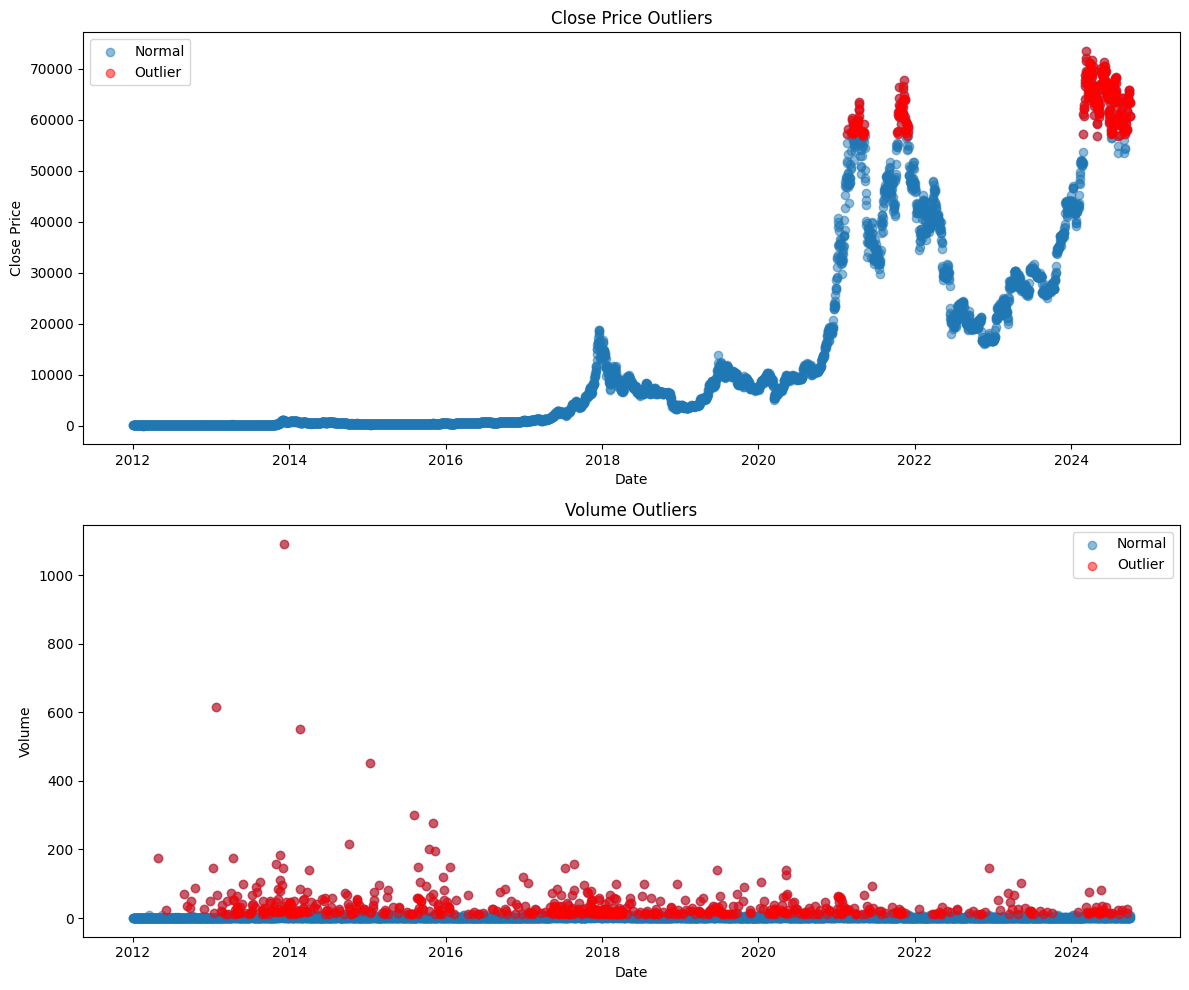


Close Price Outliers Summary:
count      297.000000
mean     63028.059461
std       4057.126061
min      56796.000000
25%      59462.000000
50%      62853.040000
75%      66099.000000
max      73468.000000
Name: Close, dtype: float64

Volume Outliers Summary:
count     608.000000
mean       38.661677
std        65.665723
min        10.243759
25%        14.011733
50%        21.765234
75%        41.816532
max      1092.500223
Name: Volume, dtype: float64


In [18]:
# Outlier Analysis
import numpy as np

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in Close price
price_outliers = detect_outliers(df, 'Close')

# Detect outliers in Volume
volume_outliers = detect_outliers(df, 'Volume')

print("Number of outliers in Close price:", len(price_outliers))
print("Number of outliers in Volume:", len(volume_outliers))

# Visualize outliers
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Close price outliers
ax1.scatter(df.index, df['Close'], alpha=0.5, label='Normal')
ax1.scatter(price_outliers.index, price_outliers['Close'], color='red', alpha=0.5, label='Outlier')
ax1.set_title('Close Price Outliers')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax1.legend()

# Volume outliers
ax2.scatter(df.index, df['Volume'], alpha=0.5, label='Normal')
ax2.scatter(volume_outliers.index, volume_outliers['Volume'], color='red', alpha=0.5, label='Outlier')
ax2.set_title('Volume Outliers')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend()

plt.tight_layout()
plt.show()

# Print some statistics about the outliers
if len(price_outliers) > 0:
    print("\nClose Price Outliers Summary:")
    print(price_outliers['Close'].describe())

if len(volume_outliers) > 0:
    print("\nVolume Outliers Summary:")
    print(volume_outliers['Volume'].describe())

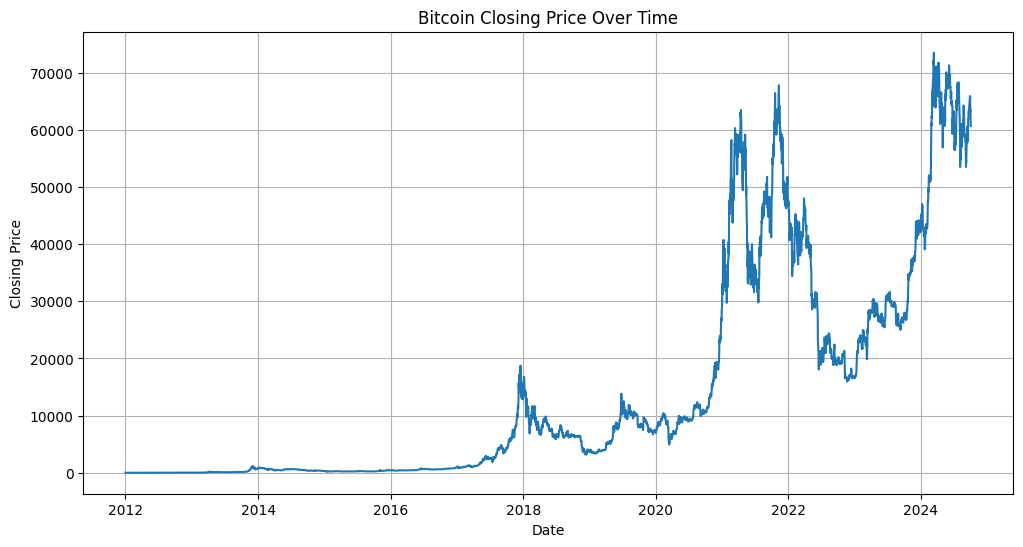

Overall price change: 1252647.93%


In [19]:
import matplotlib.pyplot as plt
# Bitcoin price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Calculate and print price change
price_change = ((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]) * 100
print(f"Overall price change: {price_change:.2f}%")

Text(0.5, 0, 'Closing Price')

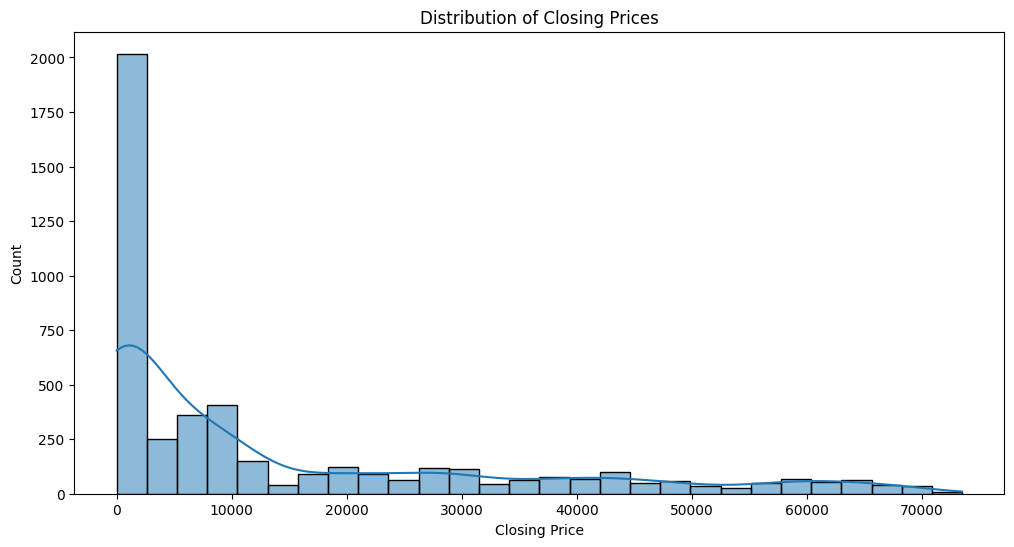

In [20]:
# Distribution of closing prices
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')

Text(0, 0.5, 'Volume')

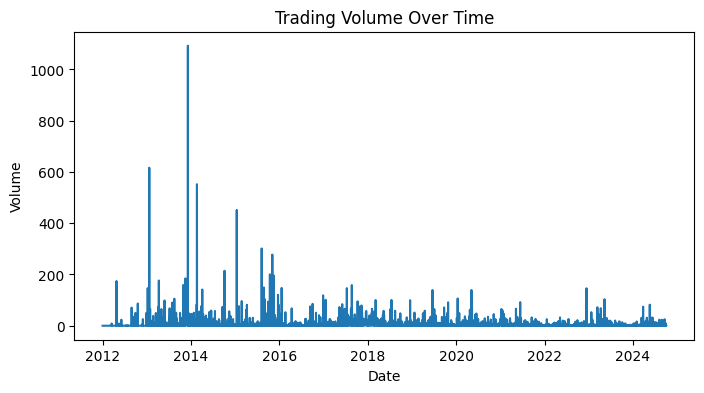

In [21]:
# Volume over time
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

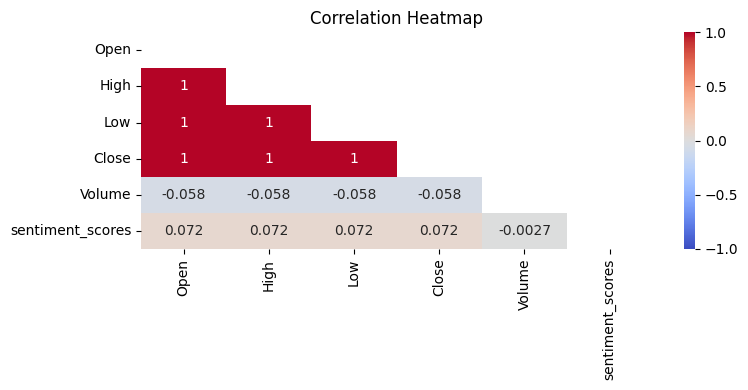


Correlation Matrix:
                      Open      High       Low     Close    Volume  \
Open              1.000000  0.999999  0.999999  0.999999 -0.058195   
High              0.999999  1.000000  0.999999  0.999999 -0.058105   
Low               0.999999  0.999999  1.000000  0.999999 -0.058303   
Close             0.999999  0.999999  0.999999  1.000000 -0.058219   
Volume           -0.058195 -0.058105 -0.058303 -0.058219  1.000000   
sentiment_scores  0.072314  0.072324  0.072361  0.072362 -0.002661   

                  sentiment_scores  
Open                      0.072314  
High                      0.072324  
Low                       0.072361  
Close                     0.072362  
Volume                   -0.002661  
sentiment_scores          1.000000  


In [22]:
# Correlation heatmap
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment_scores']
numeric_df = df[numeric_columns]


plt.figure(figsize=(8, 4))
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(corr)

In [23]:
df.head()

,Open,High,Low,Close,Volume,sentiment_scores,is_real_sentiment
date,,,,,,,
2012-01-01,4.84,4.84,4.84,4.84,0.0,0.201493,False
2012-01-02,5.00,5.00,5.00,5.00,0.0,0.201493,False
2012-01-03,5.29,5.29,5.29,5.29,0.0,0.201493,False
2012-01-04,5.57,5.57,5.57,5.57,0.0,0.201493,False
2012-01-05,6.42,6.42,6.42,6.42,0.0,0.201493,False


In [24]:
df.to_csv('../data/processed/processed_data.csv')